# Handling data of missing categorical variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("F:/files/House Price Prediction.csv")

# Analyze the data first

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
lst = []
for i in data.columns:
    if data[i].isnull().sum() >0:
        lst.append(i)

In [5]:
lst

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
data = data[lst]

In [7]:
data

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [8]:
data.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Having Huge of null values

In [9]:
df = data.copy()
#comparing their means
df.isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [10]:
for i in df.columns:
    print(i, ":", df[i].size, ":", df[i].isnull().sum())

LotFrontage : 1460 : 259
Alley : 1460 : 1369
MasVnrType : 1460 : 8
MasVnrArea : 1460 : 8
BsmtQual : 1460 : 37
BsmtCond : 1460 : 37
BsmtExposure : 1460 : 38
BsmtFinType1 : 1460 : 37
BsmtFinType2 : 1460 : 38
Electrical : 1460 : 1
FireplaceQu : 1460 : 690
GarageType : 1460 : 81
GarageYrBlt : 1460 : 81
GarageFinish : 1460 : 81
GarageQual : 1460 : 81
GarageCond : 1460 : 81
PoolQC : 1460 : 1453
Fence : 1460 : 1179
MiscFeature : 1460 : 1406


In [11]:
#Replacing it with frequent values for having small null categories
lst = []
for i in df.columns:
    if df[i].isnull().sum() < 100:
        lst.append(i)
        df[i + "_mean"] = df[i].fillna(df[i].value_counts().sort_values(ascending = False).index[0])

In [12]:
df.isnull().sum()

LotFrontage           259
Alley                1369
MasVnrType              8
MasVnrArea              8
BsmtQual               37
BsmtCond               37
BsmtExposure           38
BsmtFinType1           37
BsmtFinType2           38
Electrical              1
FireplaceQu           690
GarageType             81
GarageYrBlt            81
GarageFinish           81
GarageQual             81
GarageCond             81
PoolQC               1453
Fence                1179
MiscFeature          1406
MasVnrType_mean         0
MasVnrArea_mean         0
BsmtQual_mean           0
BsmtCond_mean           0
BsmtExposure_mean       0
BsmtFinType1_mean       0
BsmtFinType2_mean       0
Electrical_mean         0
GarageType_mean         0
GarageYrBlt_mean        0
GarageFinish_mean       0
GarageQual_mean         0
GarageCond_mean         0
dtype: int64

In [13]:
def plots(df,var):
    plt.figure(figsize =(10,5))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    sns.countplot(df[var], color = col, label = var)
    plt.legend()
    plt.show()

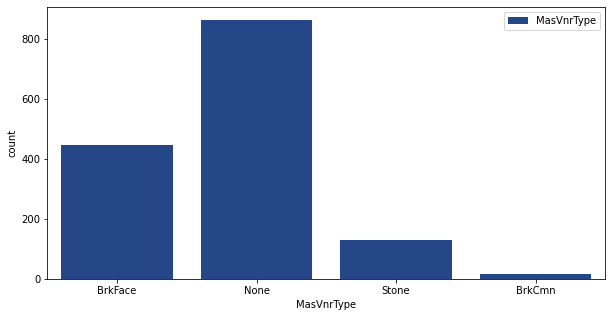

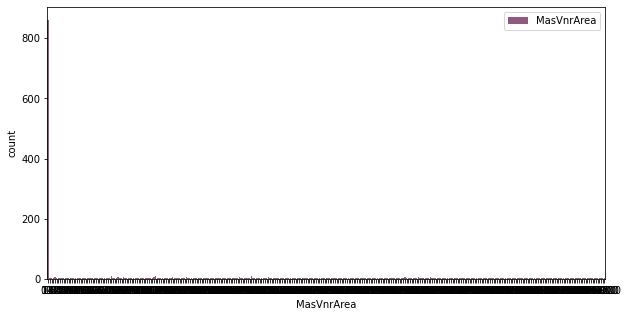

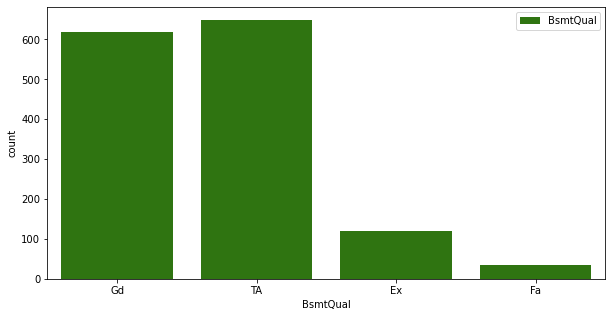

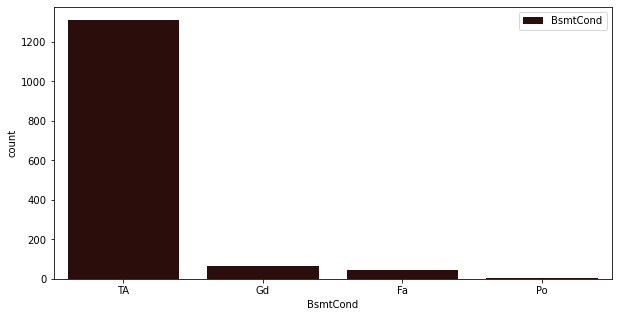

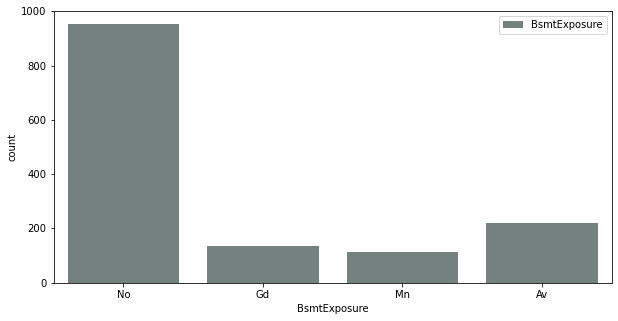

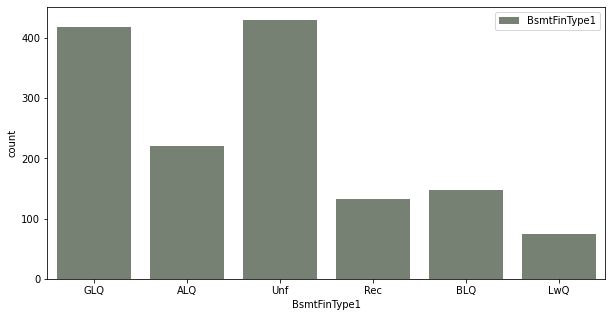

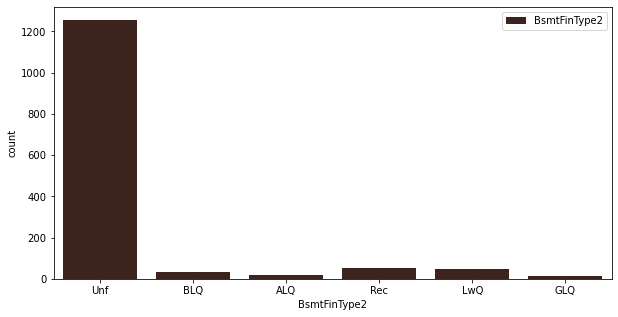

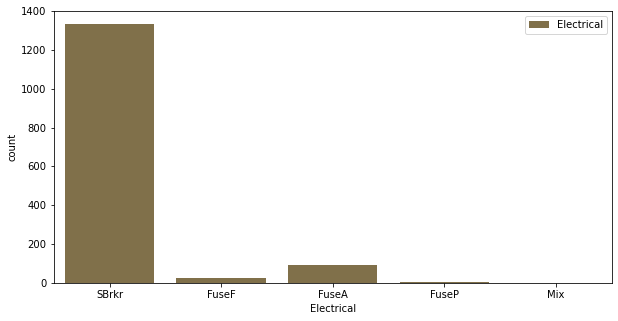

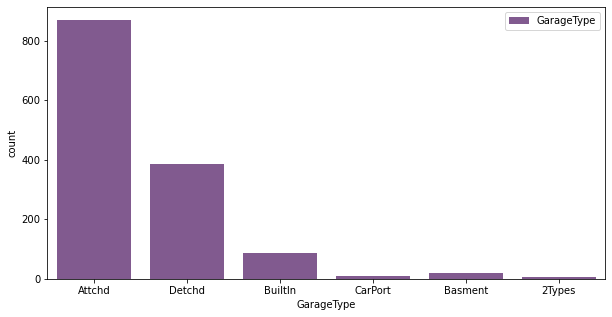

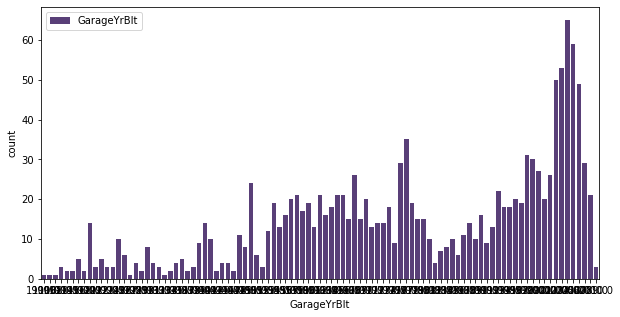

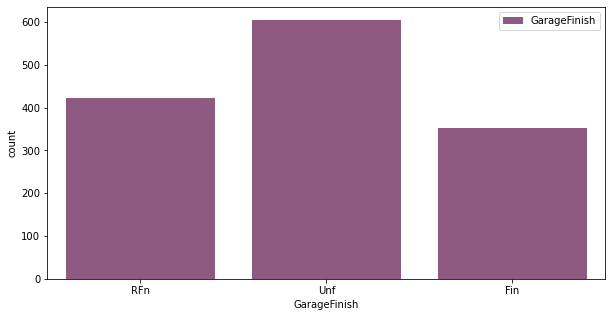

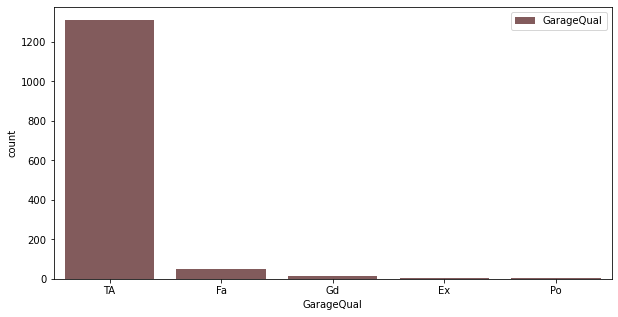

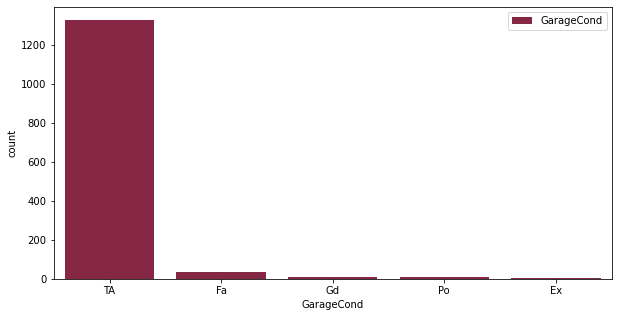

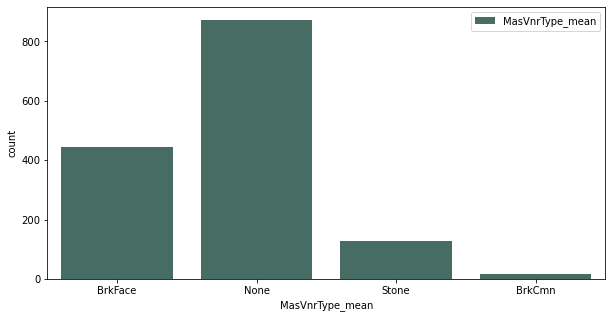

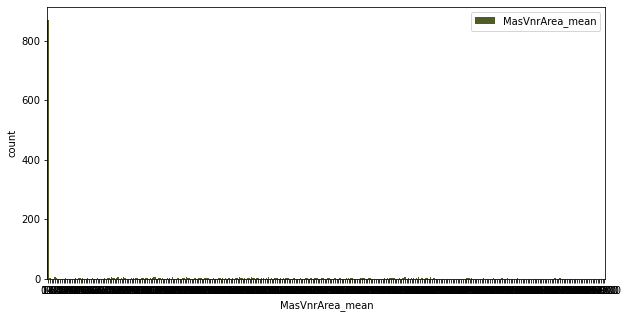

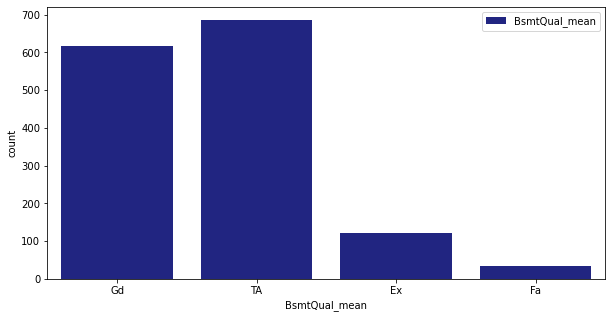

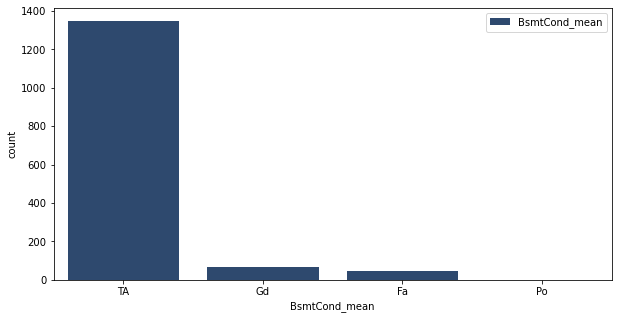

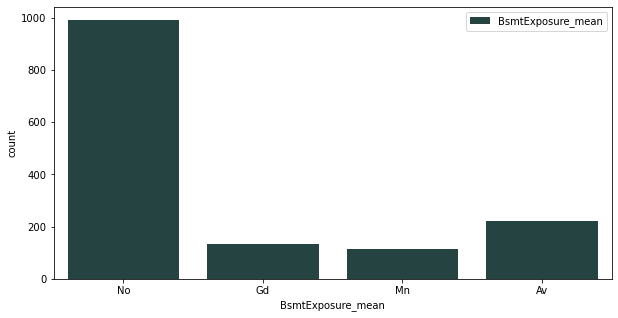

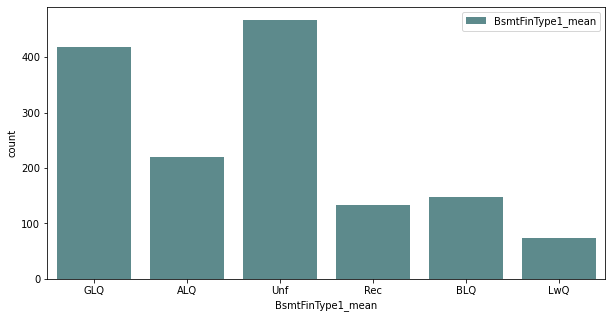

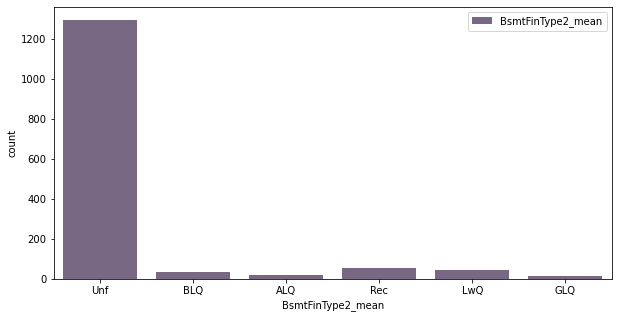

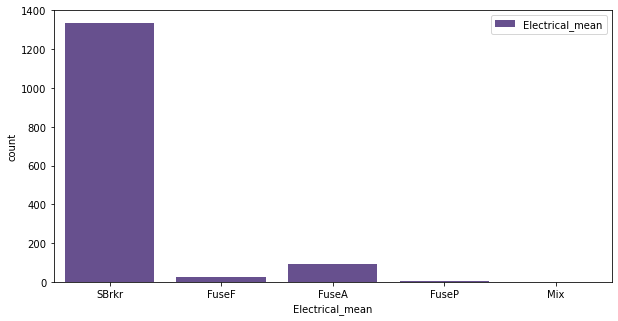

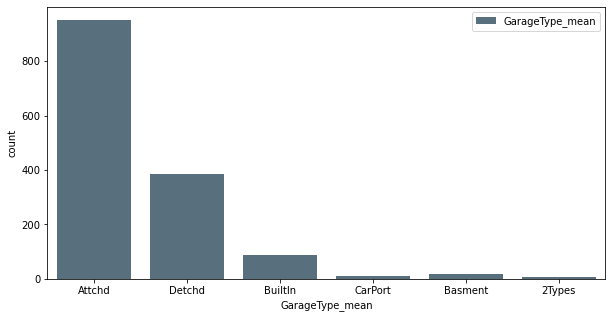

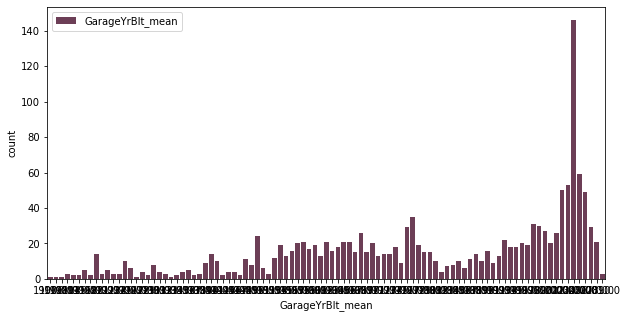

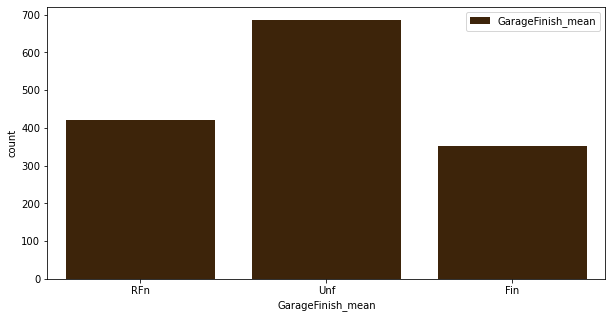

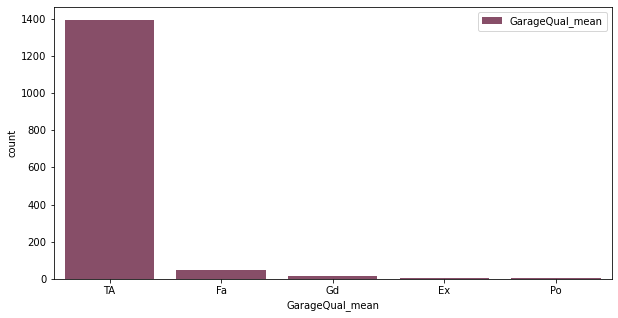

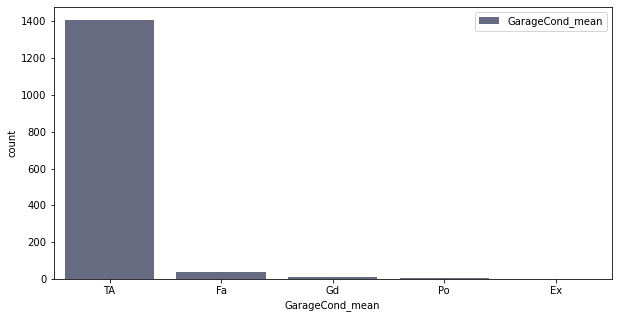

In [14]:
for i in df.columns:
    if df[i].isnull().sum()<100:
        plots(df,i)

#Shall drop that non filled columns

In [15]:
for i in df.columns:
    if df[i].isnull().sum()<100 and df[i].isnull().sum()>=1:
        df = df.drop(columns = i, axis = 1)

In [16]:
df.isnull().sum()

LotFrontage           259
Alley                1369
FireplaceQu           690
PoolQC               1453
Fence                1179
MiscFeature          1406
MasVnrType_mean         0
MasVnrArea_mean         0
BsmtQual_mean           0
BsmtCond_mean           0
BsmtExposure_mean       0
BsmtFinType1_mean       0
BsmtFinType2_mean       0
Electrical_mean         0
GarageType_mean         0
GarageYrBlt_mean        0
GarageFinish_mean       0
GarageQual_mean         0
GarageCond_mean         0
dtype: int64

# Create the exposure of the variable to the nan variable

In [17]:
for i in df.columns:
    if df[i].isnull().sum()<1000 and df[i].isnull().sum() >= 1:
        df[i + "_exposure"] = np.where(df[i].isnull(), 1, 0)

In [18]:
df.isnull().sum()

LotFrontage              259
Alley                   1369
FireplaceQu              690
PoolQC                  1453
Fence                   1179
MiscFeature             1406
MasVnrType_mean            0
MasVnrArea_mean            0
BsmtQual_mean              0
BsmtCond_mean              0
BsmtExposure_mean          0
BsmtFinType1_mean          0
BsmtFinType2_mean          0
Electrical_mean            0
GarageType_mean            0
GarageYrBlt_mean           0
GarageFinish_mean          0
GarageQual_mean            0
GarageCond_mean            0
LotFrontage_exposure       0
FireplaceQu_exposure       0
dtype: int64

In [19]:
df[['LotFrontage_exposure', 'LotFrontage']][0:20]

,LotFrontage_exposure,LotFrontage
0,0,65.0
1,0,80.0
2,0,68.0
3,0,60.0
4,0,84.0
5,0,85.0
6,0,75.0
7,1,NaN
8,0,51.0
9,0,50.0


In [20]:
#now replace that nan with something else
#Machine has learn that something happend in that place

# Replacing the nan values with another category

In [21]:
for i in df.columns:
    if df[i].isnull().sum() >1000:
        df[i] =  df[i].fillna("missing")
df

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature,MasVnrType_mean,MasVnrArea_mean,BsmtQual_mean,BsmtCond_mean,...,BsmtFinType1_mean,BsmtFinType2_mean,Electrical_mean,GarageType_mean,GarageYrBlt_mean,GarageFinish_mean,GarageQual_mean,GarageCond_mean,LotFrontage_exposure,FireplaceQu_exposure
0,65.0,missing,NaN,missing,missing,missing,BrkFace,196.0,Gd,TA,...,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA,0,1
1,80.0,missing,TA,missing,missing,missing,None,0.0,Gd,TA,...,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA,0,0
2,68.0,missing,TA,missing,missing,missing,BrkFace,162.0,Gd,TA,...,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA,0,0
3,60.0,missing,Gd,missing,missing,missing,None,0.0,TA,Gd,...,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA,0,0
4,84.0,missing,TA,missing,missing,missing,BrkFace,350.0,Gd,TA,...,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,missing,TA,missing,missing,missing,None,0.0,Gd,TA,...,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA,0,0
1456,85.0,missing,TA,missing,MnPrv,missing,Stone,119.0,Gd,TA,...,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA,0,0
1457,66.0,missing,Gd,missing,GdPrv,Shed,None,0.0,TA,Gd,...,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA,0,0
1458,68.0,missing,NaN,missing,missing,missing,None,0.0,TA,TA,...,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA,0,1


In [22]:
df.isnull().sum()

LotFrontage             259
Alley                     0
FireplaceQu             690
PoolQC                    0
Fence                     0
MiscFeature               0
MasVnrType_mean           0
MasVnrArea_mean           0
BsmtQual_mean             0
BsmtCond_mean             0
BsmtExposure_mean         0
BsmtFinType1_mean         0
BsmtFinType2_mean         0
Electrical_mean           0
GarageType_mean           0
GarageYrBlt_mean          0
GarageFinish_mean         0
GarageQual_mean           0
GarageCond_mean           0
LotFrontage_exposure      0
FireplaceQu_exposure      0
dtype: int64

Note that : If you have more null values in cata
    i) Trying to replace with something else, if the column is important.
    ii) Otherwise, It affect the model. trying to drop that column incase of not important.

# Replacing the cata values with the randomly selected variable

In [30]:
from random import sample
def randomchange(df,var):
    df[var + '_random'] = df[var]
    global random_sample
    
    random_sample = df[var].dropna().sample(df[var].isnull().sum())
    
    random_sample.index = df[df[var].isnull()].index
    
    df.loc[df[var].isnull(), var + '_random'] = random_sample

In [35]:
randomchange(df, "FireplaceQu")
randomchange(df, "LotFrontage")

In [34]:
df['FireplaceQu_random'].isnull().sum()

0

In [36]:
def plots(df, var):
    plt.figure(figsize =(10,5))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    sns.countplot(df[var], color = col, label = var)
    plt.legend()
    plt.show()

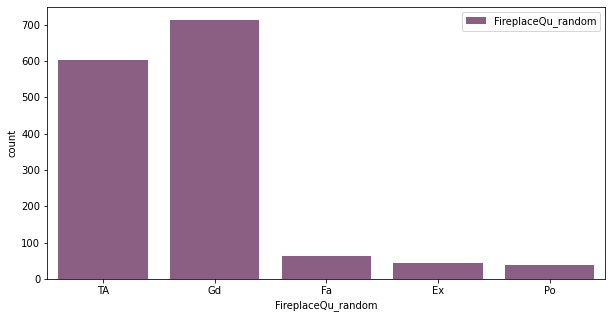

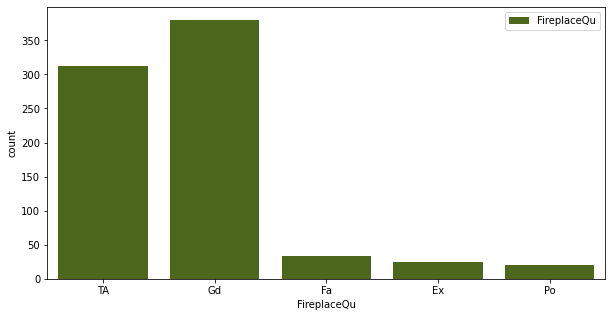

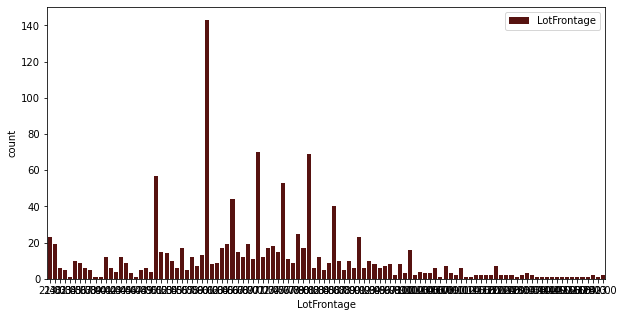

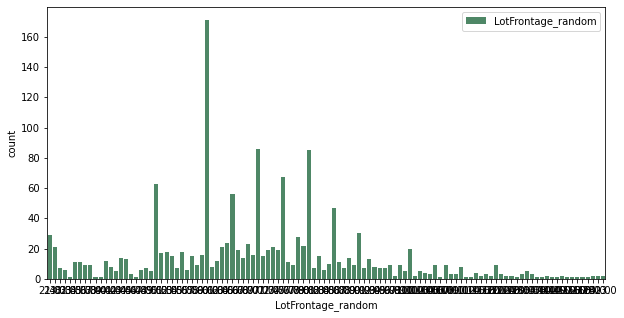

In [40]:
for i in ['FireplaceQu_random', "FireplaceQu", "LotFrontage", "LotFrontage_random"]:
    plots(df, i)